In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [35]:
from pyspark.sql import functions as f
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Examen')\
        .getOrCreate()

22/08/24 13:31:52 WARN Utils: Your hostname, MacBook-Air-de-Willians.local resolves to a loopback address: 127.0.0.1; using 192.168.18.9 instead (on interface en0)
22/08/24 13:31:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/24 13:31:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/24 13:31:54 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
dataCountry = spark.read.csv(
    'data/archive/country_wise_latest.csv',
    sep = ',',
    header = True,
    )

dataCountry.printSchema()

root
 |-- Country/Region: string (nullable = true)
 |-- Confirmed: string (nullable = true)
 |-- Deaths: string (nullable = true)
 |-- Recovered: string (nullable = true)
 |-- Active: string (nullable = true)
 |-- New cases: string (nullable = true)
 |-- New deaths: string (nullable = true)
 |-- New recovered: string (nullable = true)
 |-- Deaths / 100 Cases: string (nullable = true)
 |-- Recovered / 100 Cases: string (nullable = true)
 |-- Deaths / 100 Recovered: string (nullable = true)
 |-- Confirmed last week: string (nullable = true)
 |-- 1 week change: string (nullable = true)
 |-- 1 week % increase: string (nullable = true)
 |-- WHO Region: string (nullable = true)



In [6]:
dataCountry.show(5)

+--------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+
|Country/Region|Confirmed|Deaths|Recovered|Active|New cases|New deaths|New recovered|Deaths / 100 Cases|Recovered / 100 Cases|Deaths / 100 Recovered|Confirmed last week|1 week change|1 week % increase|          WHO Region|
+--------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+
|   Afghanistan|    36263|  1269|    25198|  9796|      106|        10|           18|               3.5|                69.49|                  5.04|              35526|          737|             2.07|Eastern Mediterra...|
|       Albania|     4880|   144|     2745|  1991|      117|         6|           63|              2.95|    

#### Actualizando la estructura de datos

In [15]:
from pyspark.sql.types import *

data_schema = [
               StructField('Country/Region', StringType(), True),
               StructField('Confirmed', IntegerType(), True),
               StructField('Deaths', IntegerType(), True),
               StructField('Recovered', IntegerType(), True),
               StructField('Active', IntegerType(), True),
               StructField('New cases', IntegerType(), True),
               StructField('New deaths', IntegerType(), True),
               StructField('New recovered', IntegerType(), True),
               StructField('Deaths / 100 Cases', DoubleType(), True),
               StructField('Recovered / 100 Cases', DoubleType(), True),
               StructField('Deaths / 100 Recovered', DoubleType(), True),
               StructField('Confirmed last week', IntegerType(), True),
               StructField('1 week change', IntegerType(), True),
               StructField('1 week % increase', DoubleType(), True),
               StructField('WHO Region', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [16]:
data = spark.read.csv(
    'data/archive/country_wise_latest.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [17]:
data.printSchema()

root
 |-- Country/Region: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- Active: integer (nullable = true)
 |-- New cases: integer (nullable = true)
 |-- New deaths: integer (nullable = true)
 |-- New recovered: integer (nullable = true)
 |-- Deaths / 100 Cases: double (nullable = true)
 |-- Recovered / 100 Cases: double (nullable = true)
 |-- Deaths / 100 Recovered: double (nullable = true)
 |-- Confirmed last week: integer (nullable = true)
 |-- 1 week change: integer (nullable = true)
 |-- 1 week % increase: double (nullable = true)
 |-- WHO Region: string (nullable = true)



In [18]:
data.show(5)

+--------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+
|Country/Region|Confirmed|Deaths|Recovered|Active|New cases|New deaths|New recovered|Deaths / 100 Cases|Recovered / 100 Cases|Deaths / 100 Recovered|Confirmed last week|1 week change|1 week % increase|          WHO Region|
+--------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+
|   Afghanistan|    36263|  1269|    25198|  9796|      106|        10|           18|               3.5|                69.49|                  5.04|              35526|          737|             2.07|Eastern Mediterra...|
|       Albania|     4880|   144|     2745|  1991|      117|         6|           63|              2.95|    

In [55]:
data = data.withColumnRenamed('WHO Region', 'WHO_Region')

In [20]:
data.write.parquet('data/parquets/country')

Lectura formato pandas

In [21]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import pandas as pd
import numpy as np

In [56]:
data.describe().toPandas()

,summary,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO_Region
0,count,187,187,187,187,187,187,187,187,187,187,182,187,187,187,187
1,mean,None,88130.935828877,3497.51871657754,50631.48128342246,34001.935828877,1222.957219251337,28.9572192513369,933.812834224599,3.0195187165775392,64.82053475935835,40.558296703296705,78682.47593582887,9448.459893048128,13.606203208556153,None
2,stddev,None,383318.6638306154,14100.00248201848,190188.18964313966,213326.17337142891,5710.374790280563,120.03717295550823,4197.719634688254,3.454302488361351,26.287694261858874,336.6693570994989,338273.67656653706,47491.12768403526,24.50983774445599,None
3,min,Afghanistan,10,0,0,0,0,0,0,0.0,0.0,0.0,10,-47,-3.84,Africa
4,max,Zimbabwe,4290259,148011,1846641,2816444,56336,1076,33728,28.56,100.0,3259.26,3834677,455582,226.32,Western Pacific


### Agrupando por Country el numero de 'Deaths', 'Active', 'New cases'

In [57]:
data.select(['WHO_Region', 'Deaths', 'Active', 'New cases']).groupBy('WHO_Region').mean().show()

+--------------------+------------------+------------------+------------------+
|          WHO_Region|       avg(Deaths)|       avg(Active)|    avg(New cases)|
+--------------------+------------------+------------------+------------------+
|              Europe|3770.4285714285716|19547.428571428572|398.10714285714283|
|     Western Pacific|          515.5625|         4838.0625|          205.5625|
|              Africa|254.64583333333334|         5632.0625|253.66666666666666|
|Eastern Mediterra...|1742.6818181818182|11409.318181818182| 564.0909090909091|
|            Americas| 9792.342857142858|115083.94285714286| 3700.885714285714|
|     South-East Asia|            4134.9|           63701.5|            4899.3|
+--------------------+------------------+------------------+------------------+



In [58]:
data.filter(data.Active.between(73695.0, 201097.0)).show(5)

+--------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+---------------+
|Country/Region|Confirmed|Deaths|Recovered|Active|New cases|New deaths|New recovered|Deaths / 100 Cases|Recovered / 100 Cases|Deaths / 100 Recovered|Confirmed last week|1 week change|1 week % increase|     WHO_Region|
+--------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+---------------+
|     Argentina|   167416|  3059|    72575| 91782|     4890|       120|         2057|              1.83|                43.35|                  4.21|             130774|        36642|            28.02|       Americas|
|    Bangladesh|   226225|  2965|   125683| 97577|     2772|        37|         1801|              1.31|                55.56|  

# Visualizando datos

In [59]:
sec_df =  data.select(['WHO_Region', 'Deaths', 'Active', 'New cases']).groupBy('WHO_Region').mean().toPandas()

In [60]:
sec_df

,WHO_Region,avg(Deaths),avg(Active),avg(New cases)
0,Europe,3770.428571,19547.428571,398.107143
1,Western Pacific,515.562500,4838.062500,205.562500
2,Africa,254.645833,5632.062500,253.666667
3,Eastern Mediterranean,1742.681818,11409.318182,564.090909
4,Americas,9792.342857,115083.942857,3700.885714
5,South-East Asia,4134.900000,63701.500000,4899.300000


<AxesSubplot:xlabel='WHO_Region'>

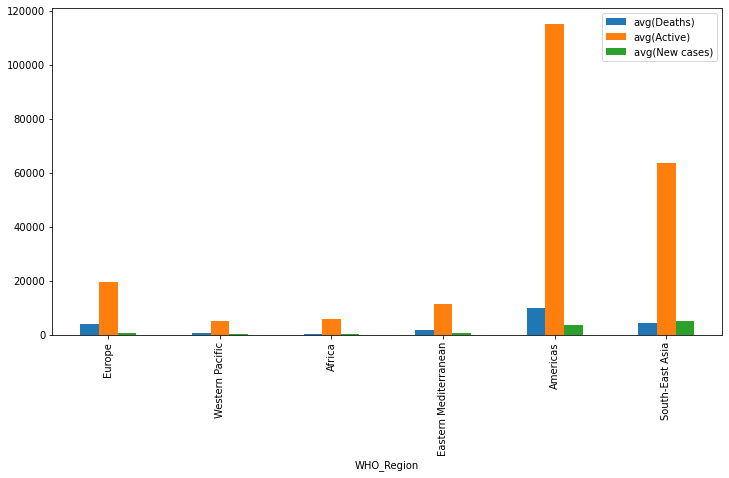

In [62]:
sec_df.plot(kind = 'bar', x='WHO_Region', y = sec_df.columns.tolist()[1:], figsize=(12, 6))